In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cicids2017/Week_filtered.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLear

# Data Preprocessing

In [2]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

if torch.cuda.is_available():
    import cuml
    import cudf
    import cupy

**Monday - Benign**

In [3]:
Monday = pd.read_csv('/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
columns = [i.strip() for i in Monday.columns.to_list()]
Monday.columns = columns
Monday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
print(len(columns))
Monday['Label'].value_counts()

79


Label
BENIGN    529918
Name: count, dtype: int64

**Tuesday - Benign + BruteForce**

In [5]:
Tuesday = pd.read_csv('/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
Tuesday.columns = columns
Tuesday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
Tuesday['Label'].value_counts()

Label
BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name: count, dtype: int64

**Wednesday - Benign + DoS**

In [7]:
Wednesday = pd.read_csv('/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')
Wednesday.columns = columns
Wednesday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
Wednesday['Label'].value_counts()

Label
BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: count, dtype: int64

**Thursday - Benign + Web-attack & Infiltration**

In [9]:
benign_web_attack_morn = pd.read_csv('/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
benign_web_attack_noon = pd.read_csv('/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')

Thursday = pd.concat([benign_web_attack_morn,benign_web_attack_noon])
Thursday.columns = columns
Thursday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [10]:
Thursday['Label'].value_counts()

Label
BENIGN                        456752
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Name: count, dtype: int64

**Friday - Benign + Botnet + PortScan + DDoS**

In [11]:
friday_portscan = pd.read_csv('/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
friday_ddos = pd.read_csv('/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
friday_botnet = pd.read_csv('/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')

Friday = pd.concat([friday_portscan,friday_ddos,friday_botnet])
Friday.columns = columns
Friday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [12]:
Friday['Label'].value_counts()

Label
BENIGN      414322
PortScan    158930
DDoS        128027
Bot           1966
Name: count, dtype: int64

# Data Analysis

> PortScan_data = Friday[Friday['Label'] == "PortScan"]
PortScan_mean_values = PortScan_data.mean()
FTP_Patator = Tuesday[Tuesday['Label'] == "FTP-Patator"]
FTP_mean_Patator = FTP_Patator.mean()
xss_data = Thursday[Thursday['Label'] == "Web Attack � XSS"]
xss_mean_data = xss_data.mean()
benign_data = Friday[Friday['Label'] == "BENIGN"]
benign_mean_values = benign_data.mean()
>
> import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 18))
plt.subplot(4, 1, 1) 
sns.barplot(x=PortScan_mean_values.index, y=PortScan_mean_values.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features for PortScan Traffic")
plt.subplot(4, 1, 2) 
sns.barplot(x=benign_mean_values.index, y=benign_mean_values.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features for BENIGN Traffic")
plt.subplot(4, 1, 3) 
sns.barplot(x=FTP_mean_Patator.index, y=FTP_mean_Patator.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features for FTP_Patator Traffic")
plt.subplot(4, 1, 4) 
sns.barplot(x=xss_mean_data.index, y=xss_mean_data.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features for xss_data Traffic")
plt.tight_layout()
plt.show()

In [13]:
# Density plots of features function
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2, 3, figsize=(16, 12))
    
    failed_features = []  
    
    for feature in features:
        try:
            i += 1
            plt.subplot(2, 3, i) 
            
            sns.distplot(df1[feature], label=label1, hist=False, kde_kws={'bw': 0.1})
            sns.distplot(df2[feature], label=label2, hist=False, kde_kws={'bw': 0.1})
            
            plt.xlabel(feature, fontsize=9)  
            locs, labels = plt.xticks()
            plt.tick_params(axis='x', which='major', labelsize=8, pad=-1)  
            plt.tick_params(axis='y', which='major', labelsize=6) 
        except:
            print(feature + 'KDE failed')
            failed_features.append(feature) 
            continue
    
    plt.show() 
    return failed_features  

<Figure size 640x480 with 0 Axes>

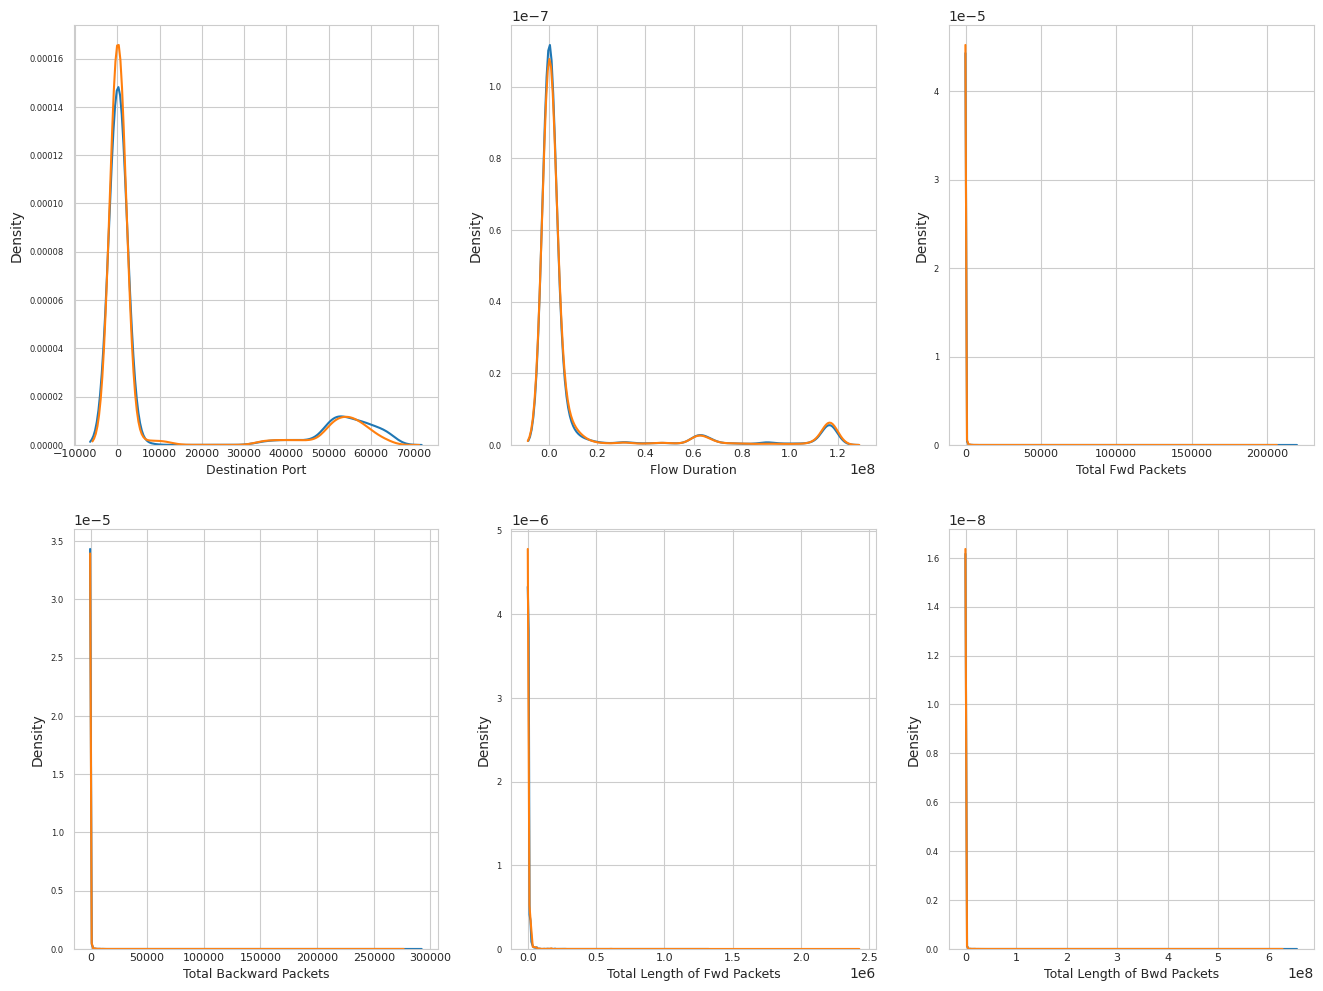

[]

In [14]:
features = ['Destination Port','Flow Duration','Total Fwd Packets','Total Backward Packets','Total Length of Fwd Packets','Total Length of Bwd Packets']

plot_feature_distribution(Monday, Tuesday, 'benign', 'benign', features)

<Figure size 640x480 with 0 Axes>

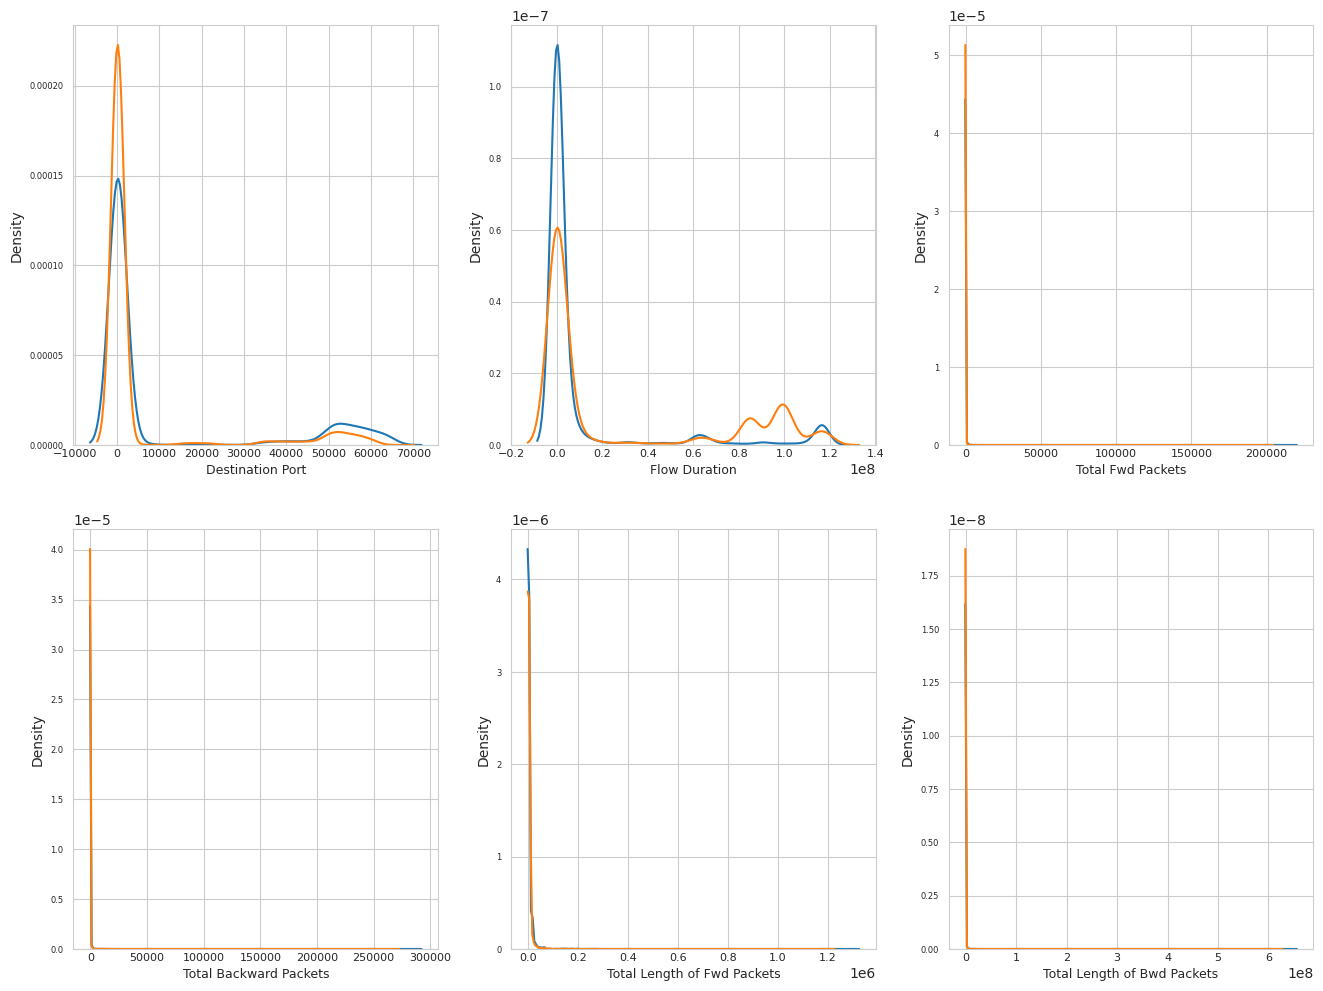

[]

In [15]:
plot_feature_distribution(Monday, Wednesday, 'benign', 'benign', features)

<Figure size 640x480 with 0 Axes>

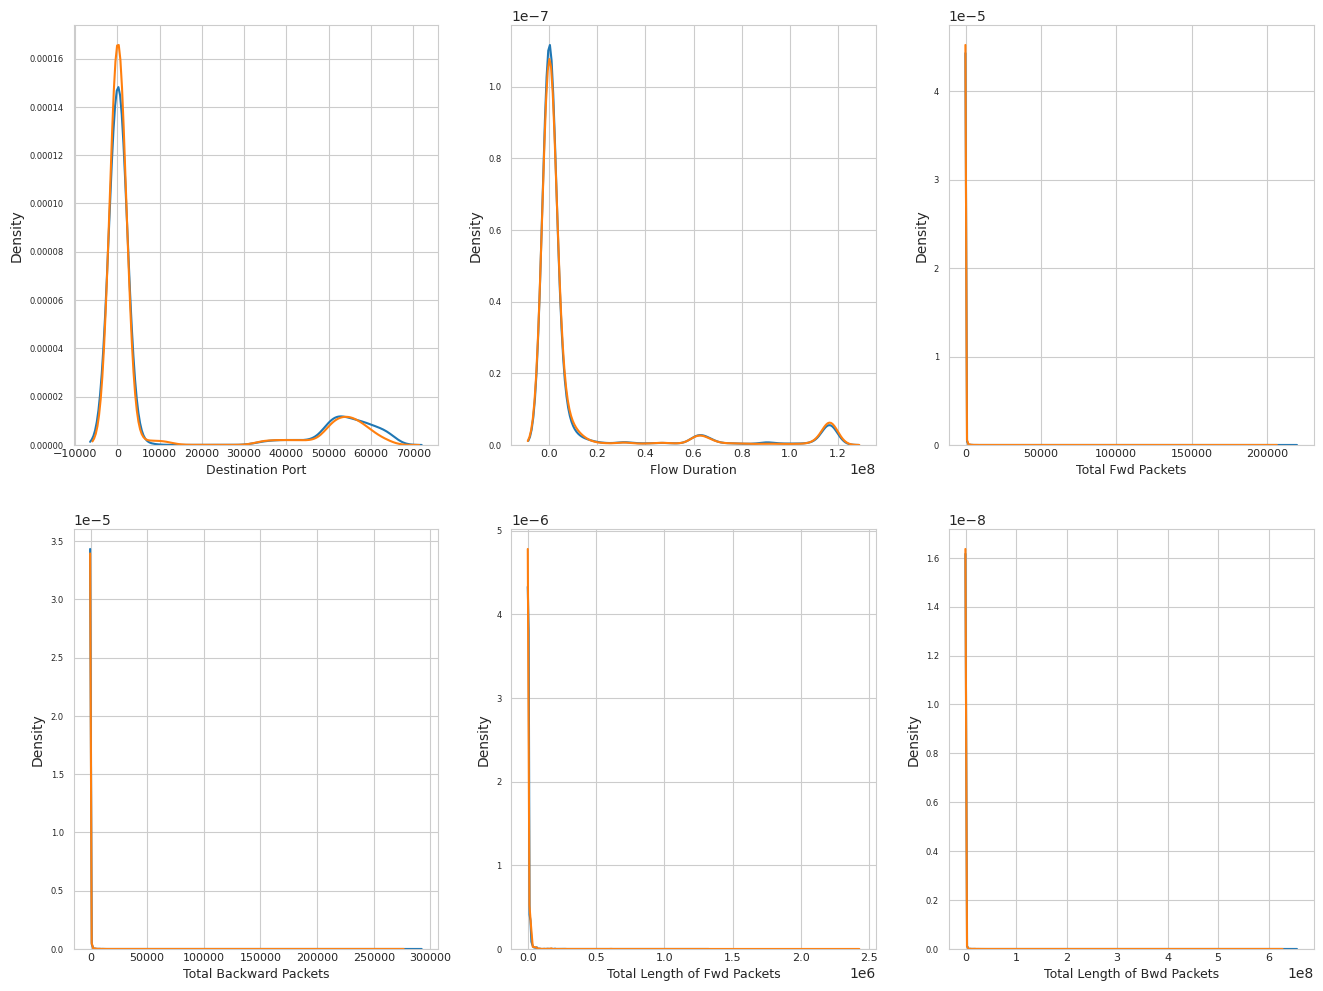

[]

In [16]:
plot_feature_distribution(Monday, Tuesday, 'benign', 'benign', features)

<Figure size 640x480 with 0 Axes>

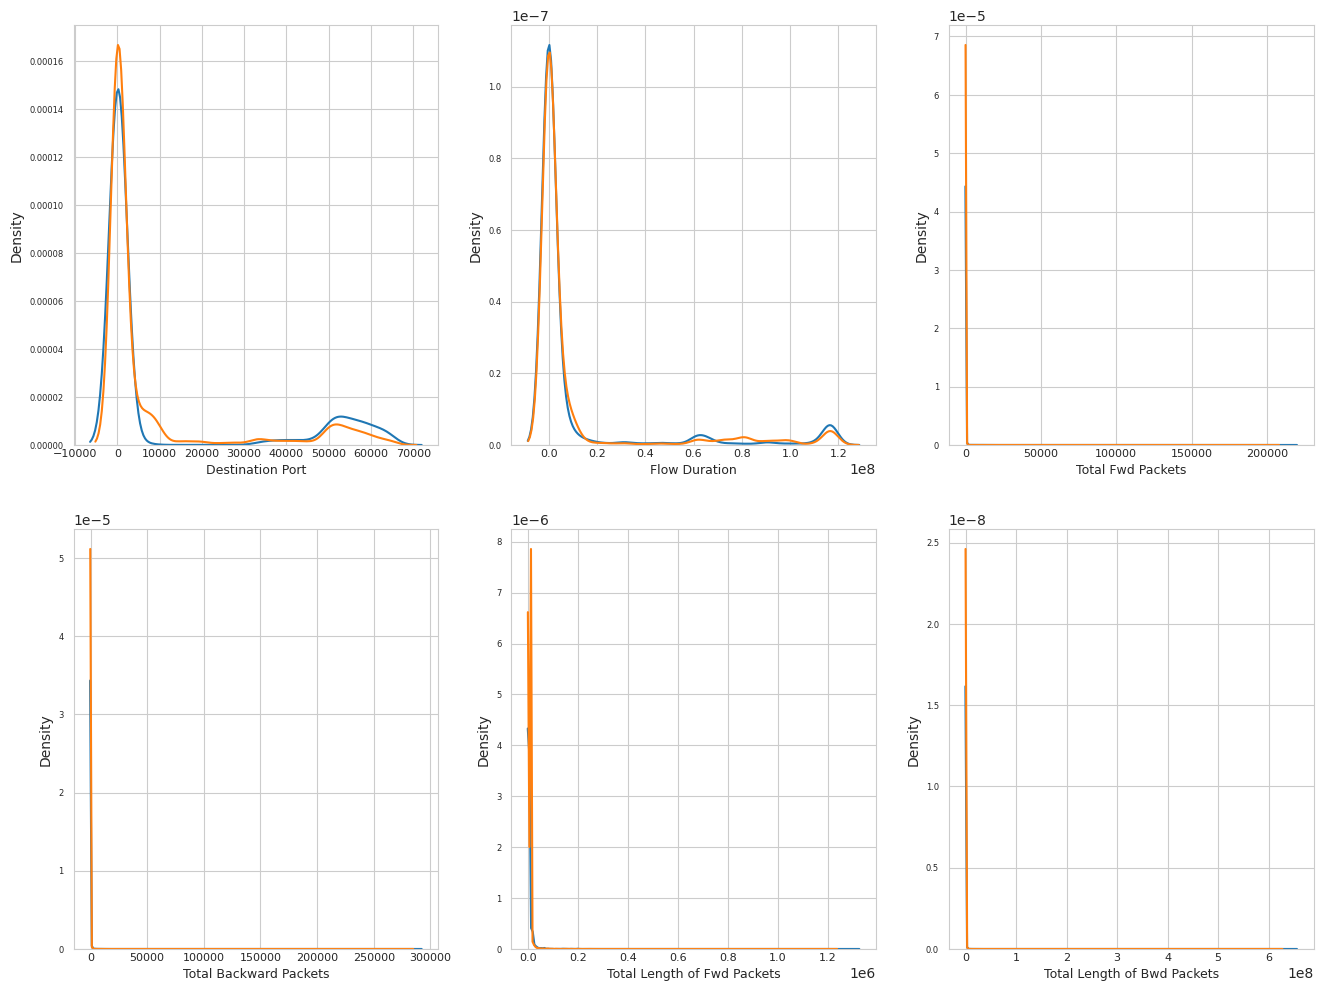

[]

In [17]:
plot_feature_distribution(Monday, Friday, 'benign', 'benign', features)

 Combine all attacks & keep on different attacks from each day for better analysis

In [18]:
Week = pd.concat([Monday,Tuesday[Tuesday.Label != 'BENIGN'],Wednesday[Wednesday.Label != 'BENIGN'],Thursday[Thursday.Label != 'BENIGN'],Friday[Friday.Label != 'BENIGN']]).reset_index(drop=True)
Week.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Optimizing memory, Deleting unused datasets, generate feature statistcis

In [19]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    
    return df

What does this do?
Optimizes Memory Usage: This function reduces the memory usage of the DataFrame by converting columns to the smallest possible data type without losing information.

Checks Numeric Columns: It iterates through all columns in the DataFrame and checks if they are numeric (int16, int32, int64, float16, float32, float64).

Downcasts Data Types:

For integer columns, it downcasts to the smallest integer type (int8, int16, int32, int64) that can hold the range of values in the column.

For float columns, it downcasts to float32 if possible; otherwise, it keeps float64.

Prints Memory Reduction: It prints the memory usage before and after optimization, along with the percentage reduction.

Why is this done?
Large datasets like CICIDS2017 can consume a lot of memory, especially when working with multiple days of network traffic data.

Reducing memory usage makes the dataset more manageable, especially when working in environments with limited memory (e.g., Kaggle notebooks or local machines).* 

In [20]:
Week = reduce_mem_usage(Week)

Mem. usage decreased to 326.52 Mb (54.2% reduction)


In [21]:
Week.shape

(1087564, 79)

In [22]:
import gc
del Monday,Thursday,Tuesday,Wednesday,Friday
gc.collect()
# gc -> garbage collector for remaining dataframes

63605

In [23]:
Week['Label'].value_counts()

Label
BENIGN                        529918
DoS Hulk                      231073
PortScan                      158930
DDoS                          128027
DoS GoldenEye                  10293
FTP-Patator                     7938
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1966
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name: count, dtype: int64

In [24]:
train_df = Week 

stats = []  #An empty list stats is created to store statistics for each feature (column) in train_df

for col in train_df.columns:
    stats.append((col,
                  train_df[col].nunique(),  #Counts the number of unique values in the column
                  train_df[col].isnull().sum() * 100 / train_df.shape[0],  #Computes the percentage of missing values in the column
                  train_df[col].value_counts(normalize=True, dropna=False).values[0] * 100, #Finds the most common value's percentage in the column
                  train_df[col].dtype))  #Gets the data type of the column

#Convert the List into a DataFrame
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])

#Sort the DataFrame by Missing Values
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
14,Flow Bytes/s,636148,0.093144,12.418028,float64
58,Fwd Avg Bulk Rate,1,0.000000,100.000000,int8
56,Fwd Avg Bytes/Bulk,1,0.000000,100.000000,int8
55,Fwd Header Length.1,1750,0.000000,17.528164,int32
54,Avg Bwd Segment Size,45488,0.000000,25.304074,float32
...,...,...,...,...,...
23,Fwd IAT Max,221052,0.000000,26.803940,int32
22,Fwd IAT Std,255570,0.000000,54.126470,float32
21,Fwd IAT Mean,278214,0.000000,26.803940,float32
20,Fwd IAT Total,251340,0.000000,26.803940,int32


In [25]:
#Removes all rows that contain any missing (NaN) values & Resets the index after dropping rows to avoid gaps
Week = Week.dropna().reset_index(drop = True)

#Sanity check only
Week['Flow Bytes/s'].isnull().sum()
Week.shape

#only one unique value, they are meaningless.
meaningless_feature = stats_df[stats_df['Unique_values']==1]['Feature'].to_list()
Week = Week.drop(columns=meaningless_feature)

Week.shape

(1086551, 69)

In [26]:
Week.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# EDA

**plot_confusion_matrix**

In [27]:
import itertools

def plot_confusion_matrix(cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):

    plt.figure(figsize=(10, 8))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)  # 设置 x 轴标签
    plt.yticks(tick_marks, classes)  # 设置 y 轴标签

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 对混淆矩阵进行归一化
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.  # 计算阈值，用于决定文本颜色
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # 在矩阵每个单元格中添加文本标签，根据阈值选择黑色或白色文本颜色
        plt.text(j, i, cm[i, j],
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()  # 调整图像布局
    plt.ylabel('True label')  # 设置 y 轴标签
    plt.xlabel('Predicted label')  # 设置 x 轴标签
    plt.show()  # 显示绘制的图像

**dimensionality_reduction**

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def DimensionalityReduction(df, features, d=2, target='Label', method='tsne'):
    nonull_df = df.dropna()

    #Uses StandardScaler to normalize all feature values so they have mean = 0 and standard deviation = 1.This step is essential for PCA and t-SNE to work effectively.
    X_std = StandardScaler().fit_transform(nonull_df[features])
    
    if method == 'tsne':
        tsne = TSNE(n_components=2)
        X_tsne = tsne.fit_transform(X_std)
        X_tsne_data = np.vstack((X_tsne.T, nonull_df[target])).T
        df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])

        plt.figure(figsize=(8, 8))
        sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2')
        plt.show()
    else:
        if d == 2:
            X_pca = PCA(n_components=2).fit_transform(X_std)
            X_pca = np.vstack((X_pca.T, nonull_df[target])).T
            
            df_pca = pd.DataFrame(X_pca, columns=['1st_Component', '2nd_Component', 'class'])
            
            plt.figure(figsize=(8, 8))
            sns.scatterplot(data=df_pca, hue='class', x='1st_Component', y='2nd_Component')
            plt.show()
        else:
            X_pca = PCA(n_components=3).fit_transform(X_std)
            X_pca = np.vstack((X_pca.T, nonull_df[target])).T
            
            df_pca = pd.DataFrame(X_pca, columns=['1st_Component', '2nd_Component', '3rd_Component', 'class'])
            df_pca['1st_Component'] = df_pca['1st_Component'].astype('float64')
            df_pca['2nd_Component'] = df_pca['2nd_Component'].astype('float64')
            df_pca['3rd_Component'] = df_pca['3rd_Component'].astype('float64')
            label_mapping = {"Benign": 1, "Malicious": 2}
            df_pca['class'] = df_pca['class'].map(label_mapping)
            df_pca['class'] = df_pca['class'].astype('float64')
            fig = plt.figure(figsize=(8, 8))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2], c=df_pca.iloc[:, 3])
            plt.show()

**Count plot is created using sns.countplot() to visualize class distribution**

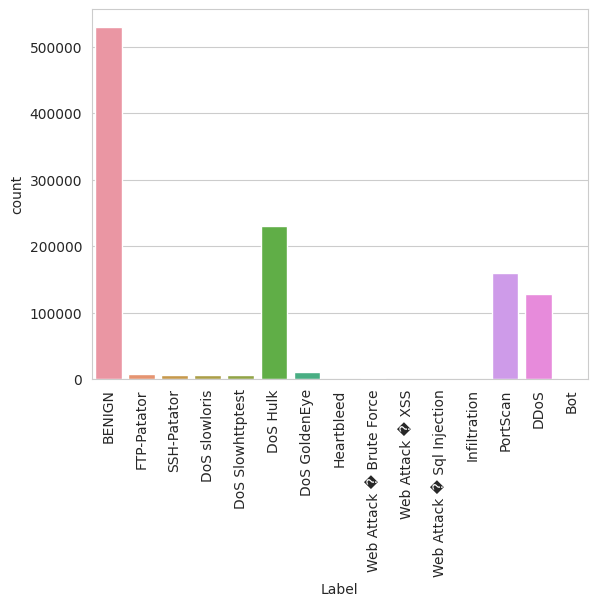

In [29]:
ax = sns.countplot(x='Label', data=Week);
ax.set_xticklabels(Week['Label'].drop_duplicates(),rotation = 90)
plt.show()

# Feature Engineering

**Label Encoding**

In [30]:
#Machine Learning models require numerical data, but IDS datasets often have categorical labels
#Categorical attack types -> Numerical Values
label_mapping = {"BENIGN": 0, "DoS Hulk": 1,'PortScan':2,'DDoS':3,'DoS GoldenEye':4,
                 'FTP-Patator':5,'SSH-Patator':6,'DoS slowloris':7,'DoS Slowhttptest':8,'Bot':9,'Web Attack � Brute Force':10,
                 'Web Attack � XSS':11,'Infiltration':12,'Web Attack � Sql Injection':13,'Heartbleed':14}
Week['Label'] = Week['Label'].map(label_mapping)

#handling inf(infinite) values
#Infinite values can break training and inference in ML models.
inf_cols = Week.max()[Week.max() == np.inf].index.to_list()
inf_cols

for i in inf_cols:
    Week[i] = Week[i].apply(lambda x:100000000 if x == np.inf else x)

In [31]:
# Find correlations with the target and sort
correlations = Week.corr()['Label'].sort_values(ascending=False)

# Display correlations
print('Most Positive Correlations:\n', correlations.head(10))
print('\nMost Negative Correlations:\n', correlations.tail(10))

Most Positive Correlations:
 Label                     1.000000
PSH Flag Count            0.321037
Packet Length Variance    0.270180
Bwd Packet Length Std     0.241822
Packet Length Std         0.239397
Bwd Packet Length Max     0.217989
Max Packet Length         0.216969
Average Packet Size       0.212422
Avg Bwd Segment Size      0.211347
Bwd Packet Length Mean    0.211347
Name: Label, dtype: float64

Most Negative Correlations:
 Init_Win_bytes_backward   -0.090934
Fwd Packet Length Min     -0.096819
URG Flag Count            -0.106832
Avg Fwd Segment Size      -0.109322
Fwd Packet Length Mean    -0.109322
Fwd Packet Length Std     -0.113474
Fwd Packet Length Max     -0.123982
Destination Port          -0.170449
Bwd Packet Length Min     -0.293579
Min Packet Length         -0.295933
Name: Label, dtype: float64


#  Data Splitting & Normalization

In [32]:
from sklearn.model_selection import train_test_split

#Instead of using all features, it selects only important network traffic characteristics for training
X = Week.drop(["Label"], axis=1)
X = X[['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Packet Length Variance', 'Bwd Packet Length Std', 'Max Packet Length',
       'Min Packet Length', 'Bwd Packet Length Min', 'Fwd Packet Length Max']]

if torch.cuda.is_available():
    enc = cuml.preprocessing.LabelEncoder()
    y = enc.fit_transform(Week['Label']) 
    
    #Standardizing ensures all features are on the same scale
    ss = StandardScaler()
    X = ss.fit_transform(X)  

    X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=3)
    y_test = np.array(y_test.get())

else:
    y = Week['Label'].values
    ss = StandardScaler()
    X = ss.fit_transform(X) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Model Training

**Hybrid model (CNN + RNN + LSTM)**

Epoch 1, Loss: 0.1723
Epoch 2, Loss: 0.1026
Epoch 3, Loss: 0.0877
Epoch 4, Loss: 0.0802
Epoch 5, Loss: 0.0761
Epoch 6, Loss: 0.0731
Epoch 7, Loss: 0.0713
Epoch 8, Loss: 0.0725
Epoch 9, Loss: 0.0662
Epoch 10, Loss: 0.0625
Test Accuracy: 98.32%


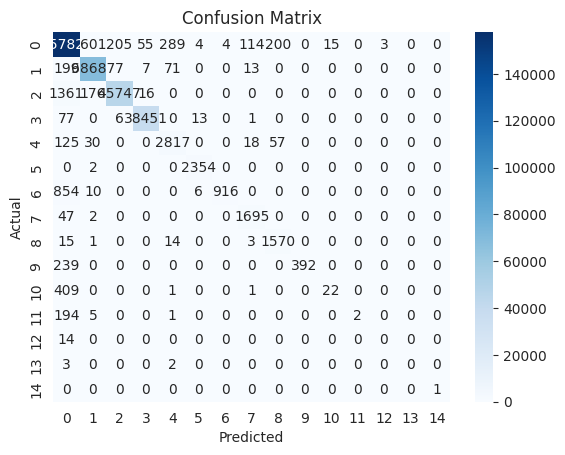

In [33]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Create DataLoader
train_data = data.TensorDataset(X_train_tensor, y_train_tensor)
test_data = data.TensorDataset(X_test_tensor, y_test_tensor)
train_loader = data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=64, shuffle=False)

# Define Hybrid CNN+RNN+LSTM Model
class HybridModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(HybridModel, self).__init__()
        
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2)
        )
        
        self.rnn = nn.RNN(64, 128, batch_first=True)
        self.lstm = nn.LSTM(128, 64, batch_first=True)
        
        self.fc = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )
        
    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension for CNN
        x = self.cnn(x)
        x = x.permute(0, 2, 1)  # Reshape for RNN/LSTM
        x, _ = self.rnn(x)
        x, _ = self.lstm(x)
        x = x[:, -1, :]
        x = self.fc(x)
        return x

# Initialize model
num_features = X_train.shape[1]
num_classes = len(np.unique(y))
model = HybridModel(num_features, num_classes).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# Train the model
train_model(model, train_loader, criterion, optimizer, epochs=10)

# Evaluation
def evaluate_model(model, test_loader):
    model.eval()
    y_pred = []
    y_true = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(y_batch.cpu().numpy())
    acc = accuracy_score(y_true, y_pred)
    print(f'Test Accuracy: {acc * 100:.2f}%')
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

evaluate_model(model, test_loader)

enchancing the hybrid model by :
1. Deeper CNN extracts richer features.
2. BiLSTM captures both past and future dependencies.
3. Dropout and BatchNorm improve generalization.
4. LeakyReLU ensures better gradient flow.

Epoch 1, Loss: 0.1671
Epoch 2, Loss: 0.0978
Epoch 3, Loss: 0.0876
Epoch 4, Loss: 0.0840
Epoch 5, Loss: 0.0763
Epoch 6, Loss: 0.0724
Epoch 7, Loss: 0.0649
Epoch 8, Loss: 0.0640
Epoch 9, Loss: 0.0580
Epoch 10, Loss: 0.0586
Test Accuracy: 98.58%


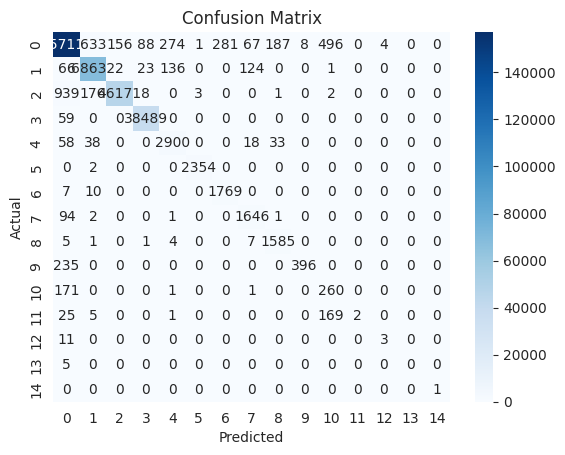

In [34]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Create DataLoader
train_data = data.TensorDataset(X_train_tensor, y_train_tensor)
test_data = data.TensorDataset(X_test_tensor, y_test_tensor)
train_loader = data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=64, shuffle=False)

# Define ImprovedHybrid CNN+RNN+LSTM Model
class ImprovedHybridModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ImprovedHybridModel, self).__init__()
        
        # CNN Layer with more depth and BatchNorm
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2)
        )
        
        # BiLSTM instead of RNN
        self.lstm = nn.LSTM(128, 64, num_layers=2, batch_first=True, bidirectional=True, dropout=0.2)
        
        # Fully Connected Layers with Dropout
        self.fc = nn.Sequential(
            nn.Linear(64 * 2, 128),  # 2 * 64 due to bidirectional LSTM
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )
        
    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension for CNN
        x = self.cnn(x)
        x = x.permute(0, 2, 1)  # Reshape for LSTM
        x, _ = self.lstm(x)
        x = x[:, -1, :]  # Get last time step
        x = self.fc(x)
        return x


# Initialize model
num_features = X_train.shape[1]
num_classes = len(np.unique(y))
model = HybridModel(num_features, num_classes).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# Train the model
train_model(model, train_loader, criterion, optimizer, epochs=10)

# Evaluation
def evaluate_model(model, test_loader):
    model.eval()
    y_pred = []
    y_true = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(y_batch.cpu().numpy())
    acc = accuracy_score(y_true, y_pred)
    print(f'Test Accuracy: {acc * 100:.2f}%')
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

evaluate_model(model, test_loader)


**Hybrid Model (AutoEncoder + Gan's)**

Epoch 1, Loss: 0.9273
Epoch 2, Loss: 0.9245
Epoch 3, Loss: 0.9219
Epoch 4, Loss: 0.9194
Epoch 5, Loss: 0.9169
Epoch 6, Loss: 0.9144
Epoch 7, Loss: 0.9119
Epoch 8, Loss: 0.9093
Epoch 9, Loss: 0.9066
Epoch 10, Loss: 0.9039
Epoch 11, Loss: 0.9009
Epoch 12, Loss: 0.8976
Epoch 13, Loss: 0.8939
Epoch 14, Loss: 0.8900
Epoch 15, Loss: 0.8858
Epoch 16, Loss: 0.8811
Epoch 17, Loss: 0.8759
Epoch 18, Loss: 0.8702
Epoch 19, Loss: 0.8640
Epoch 20, Loss: 0.8572


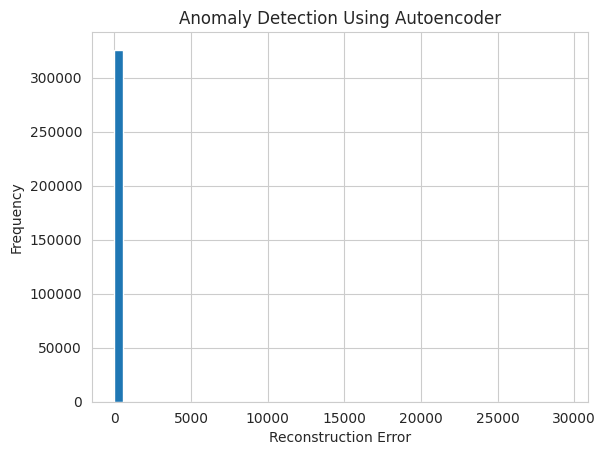

Epoch 0, D Loss: 1.4026, G Loss: 0.7475
Epoch 20, D Loss: 1.4267, G Loss: 0.6503
Epoch 40, D Loss: 1.4103, G Loss: 0.6225
Epoch 60, D Loss: 1.3584, G Loss: 0.6365
Epoch 80, D Loss: 1.3056, G Loss: 0.6615
Epoch 100, D Loss: 1.1966, G Loss: 0.7454
Epoch 120, D Loss: 1.1099, G Loss: 0.8034
Epoch 140, D Loss: 1.1690, G Loss: 0.7099
Epoch 160, D Loss: 1.2009, G Loss: 0.6900
Epoch 180, D Loss: 1.1234, G Loss: 0.8061
Training Complete!


In [35]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Split into train (normal) and test (with anomalies)
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

# Define Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Train Autoencoder
autoencoder = Autoencoder(X_train.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

def train_autoencoder(model, data, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data)
        loss.backward()
        optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

train_autoencoder(autoencoder, X_train_tensor, criterion, optimizer)

# Detect Anomalies using Reconstruction Error
autoencoder.eval()
with torch.no_grad():
    reconstructed = autoencoder(X_test_tensor)
    reconstruction_error = torch.mean((reconstructed - X_test_tensor) ** 2, axis=1).cpu().numpy()

# Plot reconstruction error
plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Anomaly Detection Using Autoencoder')
plt.show()

# Define GAN Generator and Discriminator
class Generator(nn.Module):
    def __init__(self, input_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim)
        )

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize GAN models
generator = Generator(X_train.shape[1]).to(device)
discriminator = Discriminator(X_train.shape[1]).to(device)

# Loss and Optimizers
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=0.001)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.001)

# Train GAN
num_epochs = 200
for epoch in range(num_epochs):
    noise = torch.randn(X_train.shape[0], 16).to(device)
    fake_data = generator(noise)
    real_data = torch.tensor(X_train, dtype=torch.float32).to(device)
    
    # Train Discriminator
    d_optimizer.zero_grad()
    real_loss = criterion(discriminator(real_data), torch.ones(X_train.shape[0], 1).to(device))
    fake_loss = criterion(discriminator(fake_data.detach()), torch.zeros(X_train.shape[0], 1).to(device))
    d_loss = real_loss + fake_loss
    d_loss.backward()
    d_optimizer.step()
    
    # Train Generator
    g_optimizer.zero_grad()
    g_loss = criterion(discriminator(fake_data), torch.ones(X_train.shape[0], 1).to(device))
    g_loss.backward()
    g_optimizer.step()
    
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}')

print("Training Complete!")


enhance the Autoencoder + GAN model by:
1. Using Variational Autoencoder (VAE) for better feature learning
2. Implementing Wasserstein GAN (WGAN) for stable training
3. Adding Spectral Normalization to improve discriminator performance
4. Using Residual Blocks in the generator for better data synthesis

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test = train_test_split(X, test_size=0.3, random_state=3)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
train_data = data.TensorDataset(X_train_tensor)
train_loader = data.DataLoader(train_data, batch_size=64, shuffle=True)

# Define Variational Autoencoder (VAE)
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim=16):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128), nn.ReLU(),
            nn.Linear(128, 64), nn.ReLU()
        )
        self.fc_mu = nn.Linear(64, latent_dim)
        self.fc_logvar = nn.Linear(64, latent_dim)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64), nn.ReLU(),
            nn.Linear(64, 128), nn.ReLU(),
            nn.Linear(128, input_dim), nn.Tanh()
        )
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def forward(self, x):
        x = self.encoder(x)
        mu, logvar = self.fc_mu(x), self.fc_logvar(x)
        z = self.reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar

# Define Wasserstein GAN with Spectral Normalization
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 64), nn.ReLU(),
            nn.Linear(64, 128), nn.ReLU(),
            nn.Linear(128, output_dim), nn.Tanh()
        )
    
    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.utils.spectral_norm(nn.Linear(input_dim, 128)), nn.LeakyReLU(0.2),
            nn.utils.spectral_norm(nn.Linear(128, 64)), nn.LeakyReLU(0.2),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.model(x)

# Initialize models
input_dim = X_train.shape[1]
vae = VAE(input_dim).to(device)
generator = Generator(16, input_dim).to(device)
discriminator = Discriminator(input_dim).to(device)

# Define optimizers
vae_optimizer = optim.Adam(vae.parameters(), lr=0.001)
gan_optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
gan_optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)

# Loss functions
reconstruction_loss = nn.MSELoss()
gan_loss = nn.BCEWithLogitsLoss()

# Train VAE
for epoch in range(10):
    vae.train()
    total_loss = 0
    for X_batch, in train_loader:
        vae_optimizer.zero_grad()
        recon, mu, logvar = vae(X_batch)
        loss = reconstruction_loss(recon, X_batch) + torch.mean(-0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp(), dim=1))
        loss.backward()
        vae_optimizer.step()
        total_loss += loss.item()
    print(f'VAE Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}')

# Train WGAN
for epoch in range(10):
    for X_batch, in train_loader:
        # Train Discriminator
        gan_optimizer_D.zero_grad()
        real_preds = discriminator(X_batch)
        fake_data = generator(torch.randn(X_batch.size(0), 16).to(device))
        fake_preds = discriminator(fake_data.detach())
        loss_D = -torch.mean(real_preds) + torch.mean(fake_preds)
        loss_D.backward()
        gan_optimizer_D.step()
        
        # Train Generator
        gan_optimizer_G.zero_grad()
        fake_preds = discriminator(fake_data)
        loss_G = -torch.mean(fake_preds)
        loss_G.backward()
        gan_optimizer_G.step()
    print(f'WGAN Epoch {epoch+1}, Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}')

print("Training complete!")


VAE Epoch 1, Loss: 1.0086
VAE Epoch 2, Loss: 1.0083
VAE Epoch 3, Loss: 1.0082
VAE Epoch 4, Loss: 1.0083
VAE Epoch 5, Loss: 1.0083
VAE Epoch 6, Loss: 1.0087
VAE Epoch 7, Loss: 1.0082
VAE Epoch 8, Loss: 1.0083
VAE Epoch 9, Loss: 1.0083
VAE Epoch 10, Loss: 1.0083
WGAN Epoch 1, Loss D: 0.0890, Loss G: 8.2752
WGAN Epoch 2, Loss D: -6.1470, Loss G: 39.3650
WGAN Epoch 3, Loss D: -20.3472, Loss G: 88.5934
WGAN Epoch 4, Loss D: -5.1126, Loss G: 148.4266
WGAN Epoch 5, Loss D: -14.3993, Loss G: 258.2757
WGAN Epoch 6, Loss D: -13.0052, Loss G: 362.3261
WGAN Epoch 7, Loss D: -30.1648, Loss G: 472.3714
WGAN Epoch 8, Loss D: -63.7737, Loss G: 598.2163
WGAN Epoch 9, Loss D: -15.8936, Loss G: 734.9803
WGAN Epoch 10, Loss D: -12.2239, Loss G: 878.1629
Training complete!


**Attention Mechanism for IDS**

Epoch 1, Loss: 0.1631
Epoch 2, Loss: 0.0990
Epoch 3, Loss: 0.0886
Epoch 4, Loss: 0.0853
Epoch 5, Loss: 0.0801
Epoch 6, Loss: 0.0766
Epoch 7, Loss: 0.0738
Epoch 8, Loss: 0.0710
Epoch 9, Loss: 0.0689
Epoch 10, Loss: 0.0680
Test Accuracy: 97.89%


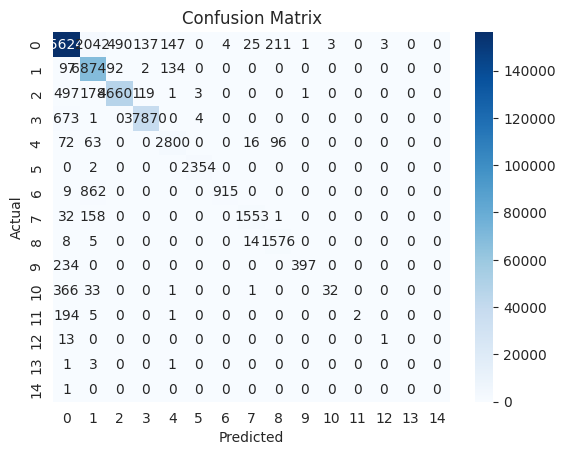

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Create DataLoader
train_data = data.TensorDataset(X_train_tensor, y_train_tensor)
test_data = data.TensorDataset(X_test_tensor, y_test_tensor)
train_loader = data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=64, shuffle=False)

# Define Attention-based Model
class AttentionModel(nn.Module):
    def __init__(self, input_dim, num_classes, num_heads=4):
        super(AttentionModel, self).__init__()
        
        # CNN Feature Extractor
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2)
        )
        
        # Transformer Encoder for Attention
        self.attention = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=num_heads, batch_first=True),
            num_layers=2
        )
        
        # LSTM for Temporal Feature Learning
        self.lstm = nn.LSTM(64, 64, batch_first=True)
        
        # Fully Connected Layers
        self.fc = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )
        
    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension for CNN
        x = self.cnn(x)
        x = x.permute(0, 2, 1)  # Reshape for Transformer Encoder
        x = self.attention(x)
        x, _ = self.lstm(x)
        x = x[:, -1, :]
        x = self.fc(x)
        return x

# Initialize model
num_features = X_train.shape[1]
num_classes = len(np.unique(y)) 
model = AttentionModel(num_features, num_classes).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# Train the model
train_model(model, train_loader, criterion, optimizer, epochs=10)

# Evaluation
def evaluate_model(model, test_loader):
    model.eval()
    y_pred = []
    y_true = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(y_batch.cpu().numpy())
    acc = accuracy_score(y_true, y_pred)
    print(f'Test Accuracy: {acc * 100:.2f}%')
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

evaluate_model(model, test_loader)


**Leverage Transfer Learning from Pretrained Tabular Models**

In [38]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.0 MB/s eta 0:00:00


In [39]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Convert y_train and y_test to numpy arrays explicitly
y_train = y_train.to_numpy() if hasattr(y_train, "to_numpy") else np.array(y_train)
y_test = y_test.to_numpy() if hasattr(y_test, "to_numpy") else np.array(y_test)

# Define TabNet Model (Pretrained + Fine-Tuning)
tabnet = TabNetClassifier()  

# Now, fit the TabNet model
tabnet.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=["accuracy"],
    max_epochs=50,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    weights=1
)

# Predictions
y_pred = tabnet.predict(X_test)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))

epoch 0  | loss: 0.82203 | val_0_accuracy: 0.83604 |  0:00:36s
epoch 1  | loss: 0.39354 | val_0_accuracy: 0.77529 |  0:01:11s
epoch 2  | loss: 0.30698 | val_0_accuracy: 0.76071 |  0:01:47s
epoch 3  | loss: 0.28285 | val_0_accuracy: 0.80097 |  0:02:22s
epoch 4  | loss: 0.25836 | val_0_accuracy: 0.83669 |  0:02:58s
epoch 5  | loss: 0.24996 | val_0_accuracy: 0.77639 |  0:03:34s
epoch 6  | loss: 0.25025 | val_0_accuracy: 0.80282 |  0:04:09s
epoch 7  | loss: 0.24041 | val_0_accuracy: 0.69963 |  0:04:45s
epoch 8  | loss: 0.23441 | val_0_accuracy: 0.65168 |  0:05:21s
epoch 9  | loss: 0.23227 | val_0_accuracy: 0.75213 |  0:05:56s
epoch 10 | loss: 0.228   | val_0_accuracy: 0.85114 |  0:06:32s
epoch 11 | loss: 0.22322 | val_0_accuracy: 0.62167 |  0:07:07s
epoch 12 | loss: 0.21215 | val_0_accuracy: 0.8056  |  0:07:43s
epoch 13 | loss: 0.21055 | val_0_accuracy: 0.73467 |  0:08:18s
epoch 14 | loss: 0.20927 | val_0_accuracy: 0.73638 |  0:08:54s
epoch 15 | loss: 0.19645 | val_0_accuracy: 0.69642 |  0

**Reinforcement Learning for Adaptive Intrusion Detection System**

In [40]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import gym

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define IDS Environment (Gym)
# =============================== 
class IntrusionDetectionEnv(gym.Env):
    def __init__(self, X, y):
        super(IntrusionDetectionEnv, self).__init__()
        
        # Load Data
        self.X = X
        self.y = y
        self.current_index = 0
        
        # Define action space (Block=0, Alert=1, Ignore=2)
        self.action_space = gym.spaces.Discrete(3)
        
        # Define state space (Network traffic feature vector)
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(X.shape[1],), dtype=np.float32)
        
    def reset(self):
        self.current_index = 0
        return self.X[self.current_index]
    
    def step(self, action):
        correct_action = self.y[self.current_index]
        
        # Define reward system
        if action == correct_action:
            reward = 1  # Correct decision
        else:
            reward = -1  # Wrong decision
        
        self.current_index += 1
        done = self.current_index >= len(self.X)
        next_state = self.X[self.current_index] if not done else np.zeros_like(self.X[0])
        
        return next_state, reward, done, {}

#  Load & Preprocess Data 
# ======================== 
def load_data():
    # Simulating dataset (Replace with actual IDS dataset like NSL-KDD or CICIDS)
    X = np.random.rand(1000, 20)  # 1000 samples, 20 features
    y = np.random.randint(0, 3, size=1000)  # 3 action classes (Block, Alert, Ignore)
    
    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Convert to float32
    X = X.astype(np.float32)
    
    return X, y

X, y = load_data()
env = IntrusionDetectionEnv(X, y)


# Define Deep Q-Network 
# ======================== 
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# Initialize model
input_dim = X.shape[1]
output_dim = env.action_space.n
model = DQN(input_dim, output_dim).to(device)


# DQN Agent for Training  
# ========================== 
class DQNAgent:
    def __init__(self, model, env):
        self.model = model
        self.env = env
        self.optimizer = optim.Adam(model.parameters(), lr=0.001)
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Initial exploration rate
        self.epsilon_decay = 0.995  # Decay rate
        self.epsilon_min = 0.01  # Minimum exploration rate

    def store_experience(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return random.randrange(self.env.action_space.n)
        state = torch.tensor(state, dtype=torch.float32).to(device).unsqueeze(0)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()

    def train(self, batch_size=64):
        if len(self.memory) < batch_size:
            return

        batch = random.sample(self.memory, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.tensor(states, dtype=torch.float32).to(device)
        actions = torch.tensor(actions, dtype=torch.int64).to(device)
        rewards = torch.tensor(rewards, dtype=torch.float32).to(device)
        next_states = torch.tensor(next_states, dtype=torch.float32).to(device)
        dones = torch.tensor(dones, dtype=torch.bool).to(device)

        # Compute Q-values
        q_values = self.model(states).gather(1, actions.unsqueeze(1)).squeeze(1)

        # Compute target Q-values
        with torch.no_grad():
            next_q_values = self.model(next_states).max(1)[0]
            target_q_values = rewards + (self.gamma * next_q_values * ~dones)

        # Compute loss
        loss = F.mse_loss(q_values, target_q_values)

        # Optimize model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Decay exploration rate
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

#  Train RL-based IDS Model 
# ========================== 
agent = DQNAgent(model, env)
episodes = 500

for episode in range(episodes):
    state = env.reset()
    total_reward = 0

    while True:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.store_experience(state, action, reward, next_state, done)
        agent.train()

        state = next_state
        total_reward += reward

        if done:
            print(f"Episode {episode+1}/{episodes}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.4f}")
            break


#  Test the RL IDS Model    
# ========================== 
def test_agent(agent, env, episodes=10):
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0

        while True:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            state = next_state
            total_reward += reward

            if done:
                print(f"[TEST] Episode {episode+1}/{episodes}, Total Reward: {total_reward}")
                break

test_agent(agent, env, episodes=5)


Episode 1/500, Total Reward: -336, Epsilon: 0.0100
Episode 2/500, Total Reward: 10, Epsilon: 0.0100
Episode 3/500, Total Reward: 240, Epsilon: 0.0100
Episode 4/500, Total Reward: 294, Epsilon: 0.0100
Episode 5/500, Total Reward: 370, Epsilon: 0.0100
Episode 6/500, Total Reward: 412, Epsilon: 0.0100
Episode 7/500, Total Reward: 452, Epsilon: 0.0100
Episode 8/500, Total Reward: 462, Epsilon: 0.0100
Episode 9/500, Total Reward: 472, Epsilon: 0.0100
Episode 10/500, Total Reward: 508, Epsilon: 0.0100
Episode 11/500, Total Reward: 510, Epsilon: 0.0100
Episode 12/500, Total Reward: 526, Epsilon: 0.0100
Episode 13/500, Total Reward: 532, Epsilon: 0.0100
Episode 14/500, Total Reward: 548, Epsilon: 0.0100
Episode 15/500, Total Reward: 550, Epsilon: 0.0100
Episode 16/500, Total Reward: 572, Epsilon: 0.0100
Episode 17/500, Total Reward: 548, Epsilon: 0.0100
Episode 18/500, Total Reward: 552, Epsilon: 0.0100
Episode 19/500, Total Reward: 576, Epsilon: 0.0100
Episode 20/500, Total Reward: 588, Epsil

In [41]:
from sklearn.metrics import accuracy_score

def evaluate_accuracy(agent, env):
    predictions, true_labels = [], []
    
    for _ in range(len(env.X)):  
        state = env.X[_]  # Get each input sample
        action = agent.act(state)  # Model's predicted action
        predictions.append(action)
        true_labels.append(env.y[_])  # Ground truth
    
    acc = accuracy_score(true_labels, predictions)
    print(f"Model Accuracy: {acc * 100:.2f}%")

evaluate_accuracy(agent, env)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model Accuracy: 98.90%
